In [1]:
from maelzel.scorestruct import *
from maelzel.core import F

In [2]:
s = ScoreStruct(r'''
9/8, 8=132
''')
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,9/8,𝅘𝅥𝅮=132,,,,9×𝅘𝅥𝅮
...,,,,,,


In [3]:
s[0].subdivisions()

[Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2),
 Fraction(1, 2)]

In [4]:
s = ScoreStruct("4/16, 72")
s[0].subdivisions()

[Fraction(1, 2), Fraction(1, 2)]

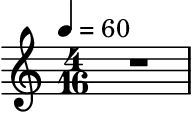

In [5]:
s = ScoreStruct('''4/16, 60''')
r = s.render()
r.show()

In [3]:
s.measure(0).subdivisionStructure()

(8, (1, 1))

In [4]:
r.score.dump()

NameError: name 'r' is not defined

In [ ]:
s.show('ly')

In [6]:
s = ScoreStruct(r'''
4/4, 80
2, 4=92
4, 3/4, 72, label=foo
6, 7/8, 8=120, mark=B
7, 7/8, 4=40
10,4=60, barline=dashed
6/8
3/4
7/8(2+2+3)
5/8(1+4)
''')
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,(4/4),𝅘𝅥=92,,,,4×𝅘𝅥
3,(4/4),,,,,4×𝅘𝅥
4,3/4,𝅘𝅥=72,foo,,,3×𝅘𝅥
5,(3/4),,,,,3×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=40,,,,7×𝅘𝅥𝅮
8,(7/8),,,,,7×𝅘𝅥𝅮
9,(7/8),,,,,7×𝅘𝅥𝅮


Changing the time signature of a measure should change the signature of consecutive measure which do not have an explicit timesig

In [7]:
s[2].timesig = (5, 8)
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,5/8,𝅘𝅥=92,,,,𝅘𝅥+𝅘𝅥𝅭
3,(5/8),,,,,𝅘𝅥+𝅘𝅥𝅭
4,3/4,𝅘𝅥=72,foo,,,3×𝅘𝅥
5,(3/4),,,,,3×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=40,,,,7×𝅘𝅥𝅮
8,(7/8),,,,,7×𝅘𝅥𝅮
9,(7/8),,,,,7×𝅘𝅥𝅮


In [8]:
s[4].timesig = (4, 4)
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,5/8,𝅘𝅥=92,,,,𝅘𝅥+𝅘𝅥𝅭
3,(5/8),,,,,𝅘𝅥+𝅘𝅥𝅭
4,4/4,𝅘𝅥=72,foo,,,4×𝅘𝅥
5,(4/4),,,,,4×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=40,,,,7×𝅘𝅥𝅮
8,(7/8),,,,,7×𝅘𝅥𝅮
9,(7/8),,,,,7×𝅘𝅥𝅮


In [9]:
s[2].quarterTempo = 96

In [10]:
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,5/8,𝅘𝅥=96,,,,𝅘𝅥+𝅘𝅥𝅭
3,(5/8),,,,,𝅘𝅥+𝅘𝅥𝅭
4,4/4,𝅘𝅥=72,foo,,,4×𝅘𝅥
5,(4/4),,,,,4×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=40,,,,7×𝅘𝅥𝅮
8,(7/8),,,,,7×𝅘𝅥𝅮
9,(7/8),,,,,7×𝅘𝅥𝅮


In [11]:
s[11].setTempo(56, (8, 0))
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,5/8,𝅘𝅥=96,,,,𝅘𝅥+𝅘𝅥𝅭
3,(5/8),,,,,𝅘𝅥+𝅘𝅥𝅭
4,4/4,𝅘𝅥=72,foo,,,4×𝅘𝅥
5,(4/4),,,,,4×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=40,,,,7×𝅘𝅥𝅮
8,(7/8),,,,,7×𝅘𝅥𝅮
9,(7/8),,,,,7×𝅘𝅥𝅮


In [12]:
s[7].tempo = (100, (4, 0))
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,5/8,𝅘𝅥=96,,,,𝅘𝅥+𝅘𝅥𝅭
3,(5/8),,,,,𝅘𝅥+𝅘𝅥𝅭
4,4/4,𝅘𝅥=72,foo,,,4×𝅘𝅥
5,(4/4),,,,,4×𝅘𝅥
6,7/8,𝅘𝅥𝅮=120,,B,,7×𝅘𝅥𝅮
7,7/8,𝅘𝅥=100,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
8,(7/8),,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
9,(7/8),,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭


## Endless vs Fixed

A ScoreStruct can be endless or fixed. By default ScoreStructs are endless, but they can be explicitely set to be fixed

In [13]:
s = ScoreStruct(r'''
4/4, 80
4, 3/4, 72
6, 7/8
''', endless=False)
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,(4/4),,,,,4×𝅘𝅥
3,(4/4),,,,,4×𝅘𝅥
4,3/4,𝅘𝅥=72,,,,3×𝅘𝅥
5,(3/4),,,,,3×𝅘𝅥
6,7/8,,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭


In a fixed struct getting a measure outside of the defined range should result in an error

In [14]:
s[20]

IndexError: index 20 out of range. The score has 7 measures defined

With an endless struct, getting a measure "outside" of the defined range extends the scorestruct

In [15]:
s = ScoreStruct(r'''
4/4, 80
4, 3/4, 72
6, 7/8
''')
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,(4/4),,,,,4×𝅘𝅥
3,(4/4),,,,,4×𝅘𝅥
4,3/4,𝅘𝅥=72,,,,3×𝅘𝅥
5,(3/4),,,,,3×𝅘𝅥
6,7/8,,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
...,,,,,,


In [16]:
s20 = s[20]
s20.timesig = (3, 4)
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥=80,,,,4×𝅘𝅥
1,(4/4),,,,,4×𝅘𝅥
2,(4/4),,,,,4×𝅘𝅥
3,(4/4),,,,,4×𝅘𝅥
4,3/4,𝅘𝅥=72,,,,3×𝅘𝅥
5,(3/4),,,,,3×𝅘𝅥
6,7/8,,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
7,(7/8),,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
8,(7/8),,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭
9,(7/8),,,,,𝅘𝅥+𝅘𝅥+𝅘𝅥𝅭


## Tempo: reference value


In [17]:
from maelzel.scorestruct import ScoreStruct
s = ScoreStruct("4/4, 8=40; 6/8, 4.=68")
s

Meas. Index,Timesig,Tempo,Label,Rehearsal,Barline,Beats
0,4/4,𝅘𝅥𝅮=40,,,,8×𝅘𝅥𝅮
1,6/8,𝅘𝅥𝅭=68,,,,3×𝅘𝅥
...,,,,,,


In [18]:
m0 = s[0]

In [19]:
m0.tempoRef

(8, 0)

In [20]:
figureDuration(*m0.tempoRef)

Fraction(1, 2)

In [25]:
from maelzel.scorestruct import *
measureBeatStructure((6, 8), tempo=60, tempoRef=(4, 1), subdivTempo=116)

[BeatDef(offset=Fraction(0, 1), duration=Fraction(1, 1), weight=1),
 BeatDef(offset=Fraction(1, 1), duration=Fraction(1, 1), weight=0),
 BeatDef(offset=Fraction(2, 1), duration=Fraction(1, 1), weight=0)]